In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time


Using TensorFlow backend.


In [2]:
#step 1: Load data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv',50,True)

In [3]:
#step 2: Build Model
model = Sequential()

model.add(LSTM(
    input_dim = 1,
    output_dim = 50,
    return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer = 'rmsprop')
print ('compilation time: ', time.time() - start)

compilation time:  0.09606432914733887


In [4]:
#step 3: Train the model
model.fit(
    X_train,
    y_train,
    batch_size = 512,
    nb_epoch = 100,
    validation_split = 0.1,
    verbose = 2)

Train on 3338 samples, validate on 371 samples
Epoch 1/100
 - 7s - loss: 0.0028 - val_loss: 6.4095e-04
Epoch 2/100
 - 4s - loss: 6.6882e-04 - val_loss: 5.8499e-04
Epoch 3/100
 - 4s - loss: 7.1475e-04 - val_loss: 4.5588e-04
Epoch 4/100
 - 4s - loss: 5.5542e-04 - val_loss: 5.7409e-04
Epoch 5/100
 - 4s - loss: 6.2676e-04 - val_loss: 4.5635e-04
Epoch 6/100
 - 4s - loss: 5.2764e-04 - val_loss: 4.0472e-04
Epoch 7/100
 - 4s - loss: 4.8176e-04 - val_loss: 3.9141e-04
Epoch 8/100
 - 4s - loss: 5.4121e-04 - val_loss: 3.3538e-04
Epoch 9/100
 - 4s - loss: 4.1757e-04 - val_loss: 3.0886e-04
Epoch 10/100
 - 4s - loss: 4.6265e-04 - val_loss: 3.0749e-04
Epoch 11/100
 - 4s - loss: 3.9788e-04 - val_loss: 3.9017e-04
Epoch 12/100
 - 4s - loss: 4.3623e-04 - val_loss: 2.4869e-04
Epoch 13/100
 - 4s - loss: 4.2211e-04 - val_loss: 3.8556e-04
Epoch 14/100
 - 4s - loss: 3.9853e-04 - val_loss: 2.5803e-04
Epoch 15/100
 - 4s - loss: 3.7121e-04 - val_loss: 2.5677e-04
Epoch 16/100
 - 4s - loss: 3.7858e-04 - val_loss: 2

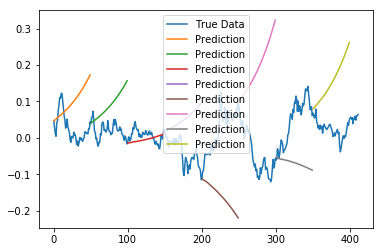

In [5]:
#step 4: Plot the predictions
predictions = lstm.predict_sequences_multiple(model,X_test,50,50)
lstm.plot_results_multiple(predictions, y_test, 50)